In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Step 1: Load Dataset
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#Step 2: Shape of Data
df.shape

(545, 13)

In [5]:
#Step 3: Data Types of Columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:

#Step 4: Check for Missing Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#if any null values present
df['airconditioning'].fillna(df['airconditioning'].mode(),inplace=True)

C:\Users\Naresh Damera\AppData\Local\Temp\ipykernel_15640\1717768649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airconditioning'].fillna(df['airconditioning'].mode(),inplace=True)


In [8]:
# Splitting Data into Independent (X) and Dependent (y) Variables
X=df.drop(columns=['price'],axis=1)
y=df['price']

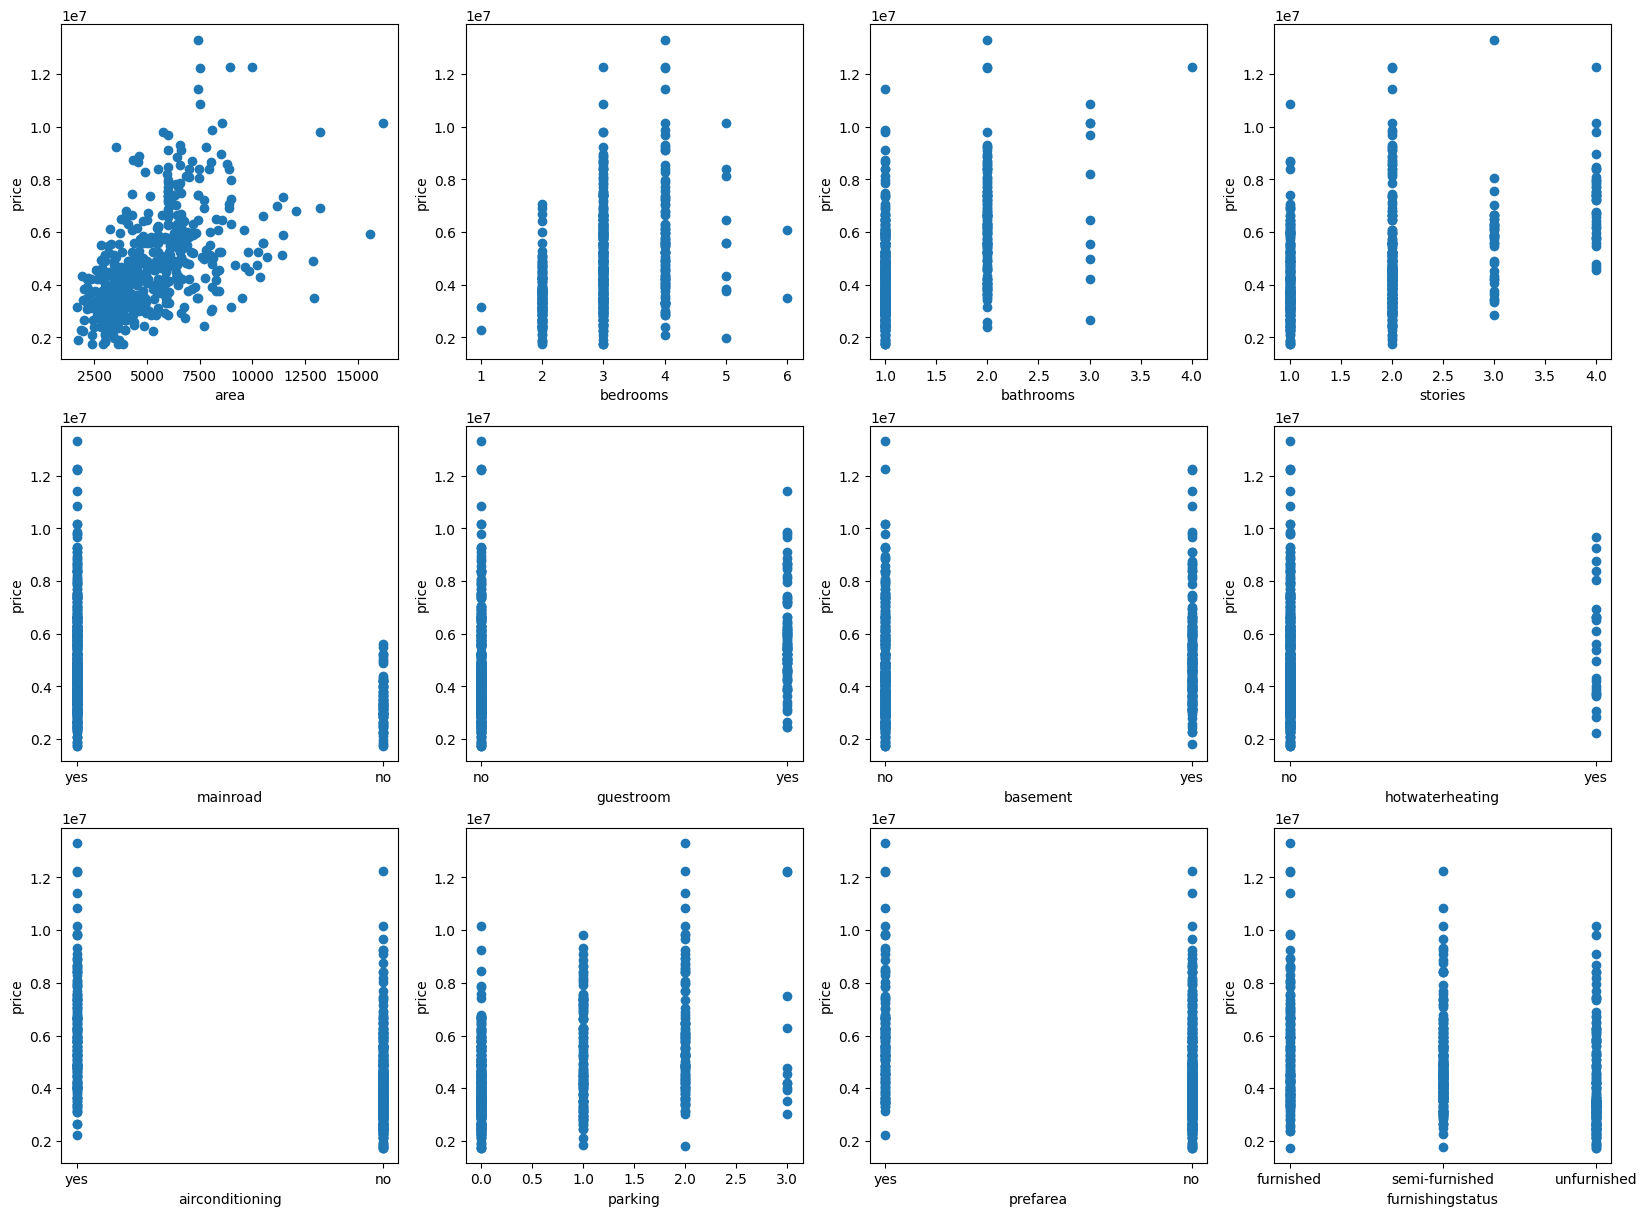

In [9]:
#Data Visualization

x_var=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 
'prefarea', 'furnishingstatus']
y_var=['price']

plt.figure(figsize=(20,20))
for i in range (len(x_var)):
  plt.subplot(4,4,i+1)
  plt.scatter(df[x_var[i]],df[y_var])
  plt.xlabel(x_var[i])
  plt.ylabel('price')
plt.show()

In [10]:
#Handling Categorical Data
X=pd.get_dummies(X,drop_first=True)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Intercept= ",model.intercept_)
print("coefficients= ",model.coef_)

Intercept=  4731721.697113491
coefficients=  [ 507847.45883091   70294.39475486  484658.34239343  353112.5362987
  206689.44250951  127943.54552885  186326.17921498  163221.55662939
  226219.62862667  405419.19233065  204218.72281516   32733.32804899
 -159239.77214902]


In [28]:
#Model Predictions
y_pred_train=model.predict(X_train)
error_train=y_train-y_pred_train
print(error_train)


49     2.141127e+05
168    2.869293e+05
340   -1.269403e+06
303    5.557994e+05
215    1.132244e+06
           ...     
414    6.635278e+05
528   -5.425247e+03
97     6.303687e+04
209    1.417460e+06
415   -2.322958e+06
Name: price, Length: 436, dtype: float64


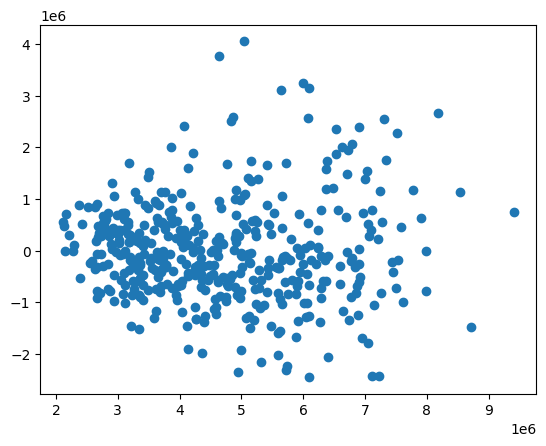

In [29]:
plt.scatter(y_pred_train,error_train)
plt.show()

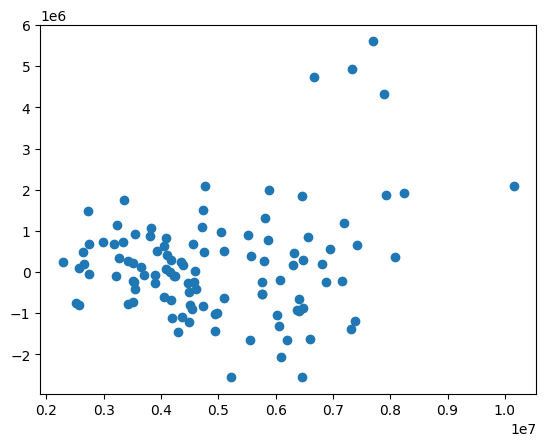

In [32]:
y_pred_test=model.predict(X_test)
plt.scatter(y_pred_test,y_test-y_pred_test)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)
print(mse)
print(r2)


1815288310164.2012
0.6427628525890587
